# Regression Predict Student Solution

© Explore Data Science Academy

<!-- ---
### Honour Code

I {**TEDDY, WAWERU**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are.  -->

#### *Team 5 Members*
- Teddy Waweru
- Stella Njuki
- MacMunashe
- Ogaga
- Ron 

<a id="cont"></a>

## Table of Contents
Introduction, Problem statement

<a href=#one>1. Importing Packages</a>

[1. Importing Packages](#one_title)

<a href=#introduction>1. Introduction</a>

<a href=#two>2. Loading Data</a>

<a href=#executive_summary>2. Executive Summary</a>

<a href=#methodology>3. Methodology</a>

<a href=#four>4. Data Engineering</a>

<a href=#exploratory_data_analysis>4. Exploratory Data Analysis (EDA)</a>

<a href=#data_engineering>5. Data Engineering</a>

<a href=#modelling>5. Modeling</a>

<a href=#model_performance>6. Model Performance</a>

<a href=#model_explanation>7. Model Explanations</a>

## Introduction


### Problem Statement
Expound the issue <br/>
Frame the solution <br/>
Justify the solution <br/>

### _Summary_ <hr>

The data provided is intended to assist with predicting the effect of climatic conditions in Spain on load shortfalls ofrenewable energy  source production against fossil fuels.<br/>
Agendas:
<br/>
Deliverables:
<br/>
Outcomes:
<br/>
Challenges:
<br/>
Future Considerations:
<br/>

## Methodology

 <a id="one"></a>
### 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---


In [48]:
# Libraries for data loading, data manipulation
import pandas as pd

#Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
from statsmodels.graphics.correlation import plot_corr


# Libraries for data preparation and model building
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from statsmodels.distributions.empirical_distribution import ECDF       #Imported for displaying the Empirical Cumulative Distribution of Features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Libraries for Model Performance
from sklearn.metrics import mean_squared_error, r2_score

#Libraries for mathematical analyses
import numpy as np

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
### 2. Loading the Datasets
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [2]:
test_df = pd.read_csv('utils/data/df_test.csv')
train_df = pd.read_csv('utils/data/df_train.csv')

<a id="three"></a>
### 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---



#### Investigating the dataset's contents

In [6]:
    print('Dataset Info: \n {}'.format(train_df.info()))
    print('Dataset Statistical Summary: \n {}'.format(train_df.describe))
    print('Dataset Null Values: \n {}'.format(train_df.isna().sum()))

    train_df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


From the output, we determine that:
1. The data contains:
    - 46 *numerical* columns
    - 3 *categorical* columns
2. The columns with **null** values:
    - Seville_pressure: 2068 values
3. The 'Unnamed 0' column appears as an indexing column. This can be dropped as it won't assist in the model's prediction performance.
4. Based on Kaggle instructions, the columns on **pressure** & **wind degree** are expressed as Categorical, thus there's need to do conversion of these features so that they match this consideration.

#### Identifying **'missing'** columns.
These are columns of weather attributes that are not available for a particular city.

In [ ]:
#Complete list of all weather attributes for each City in the dataset.
city_weather_attributes = {
    'wind_speed': ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_wind_speed', 'Seville_wind_speed'],
    'wind_deg': ['Madrid_wind_deg', 'Valencia_wind_deg', 'Bilbao_wind_deg', 'Barcelona_wind_deg', 'Seville_wind_deg'],
    'clouds_all': ['Madrid_clouds_all', 'Valencia_clouds_all', 'Bilbao_clouds_all', 'Barcelona_clouds_all', 'Seville_clouds_all'],
    'pressure': ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Barcelona_pressure', 'Seville_pressure'],
    'rain_3h': ['Madrid_rain_3h', 'Valencia_rain_3h', 'Bilbao_rain_3h', 'Barcelona_rain_3h', 'Seville_rain_3h'],
    'weather_id': ['Madrid_weather_id', 'Valencia_weather_id', 'Bilbao_weather_id', 'Barcelona_weather_id', 'Seville_weather_id'],
    'temp_min': ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Barcelona_temp_min', 'Seville_temp_min'],
    'temp_max': ['Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_max', 'Barcelona_temp_max', 'Seville_temp_max'],
    'snow_3h': ['Madrid_snow_3h', 'Valencia_snow_3h', 'Bilbao_snow_3h', 'Barcelona_snow_3h', 'Seville_snow_3h'],
    'temp': ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Barcelona_temp', 'Seville_temp'],
    'rain_1h': ['Madrid_rain_1h', 'Valencia_rain_1h', 'Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h'],
    'humidity': ['Madrid_humidity', 'Valencia_humidity', 'Bilbao_humidity', 'Barcelona_humidity', 'Seville_humidity'],
}


# Iterative to determine the missing columns
missing_cols = {}
all_cols = []
for key in city_weather_attributes.keys():
    for attribute in city_weather_attributes[key]:
        all_cols.append(attribute)
        if attribute not in train_df.columns:
            if key not in missing_cols.keys():
                missing_cols[key] = []
            missing_cols[key].append(attribute)
            missing_cols[key].sort()
      
missing_cols_df = pd.DataFrame.from_dict(missing_cols, orient = 'index')
missing_cols_df

#### Data Visualizations
---

We create a list of numerical & categorical columns for iterative plotting

In [9]:
#List of numerical feature columns in train_df, excluding the prediction variable
num_train_feature_cols = [i for i in train_df.columns if train_df[i].dtype == ('float64') and i != 'load_shortfall_3h']
num_train_feature_cols.sort()

#List of categorical feature columns
cat_train_feature_cols = [i for i in train_df.columns if train_df[i].dtype == ('object')]
cat_train_feature_cols.sort()

print(num_train_feature_cols)
print(cat_train_feature_cols)

['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_weather_id', 'Barcelona_wind_deg', 'Barcelona_wind_speed', 'Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_weather_id', 'Bilbao_wind_deg', 'Bilbao_wind_speed', 'Madrid_clouds_all', 'Madrid_humidity', 'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_weather_id', 'Madrid_wind_speed', 'Seville_clouds_all', 'Seville_humidity', 'Seville_rain_1h', 'Seville_rain_3h', 'Seville_temp', 'Seville_temp_max', 'Seville_temp_min', 'Seville_weather_id', 'Seville_wind_speed', 'Valencia_humidity', 'Valencia_pressure', 'Valencia_snow_3h', 'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_speed']
['Seville_pressure', 'Valencia_wind_deg', 'time']


##### Numerical Data Visualization

###### Scatter Plots

In [38]:
fig, axs = plt.subplots(9,5, figsize=(16,20),)

fig.subplots_adjust(hspace = 0.5, wspace=.2)

i = 0
axs = axs.ravel()

for index, column in enumerate(num_train_feature_cols) :                    #Iterate through the numerical columns
    axs[i].set_title("{} vs. Load_shortfall".format(column),fontsize=12)    #Plot the axis title

    # axs[i].scatter(x=train_df[column],                                      # Plot the scatter graphs
    #                 y=train_df['load_shortfall_3h'],
    #                 color='#349',edgecolor='k')
    sns.jointplot(x = train_df[column],
                    y = train_df['load_shortfall_3h'],
                    ax = axs[i])
    i += 1                                         #Iterate to the next axis after plotting 
    fig.tight_layout(pad=1)
    fig.show()

The scatter plots between numerical features & the prediction variable show:
1. None of the features have a verifiable linear relationship with the prediction variable.
2. Some feeatures have particular outliers that differ away from the general clusters. It will be necessary to clean out these datapoints.

###### Histograms

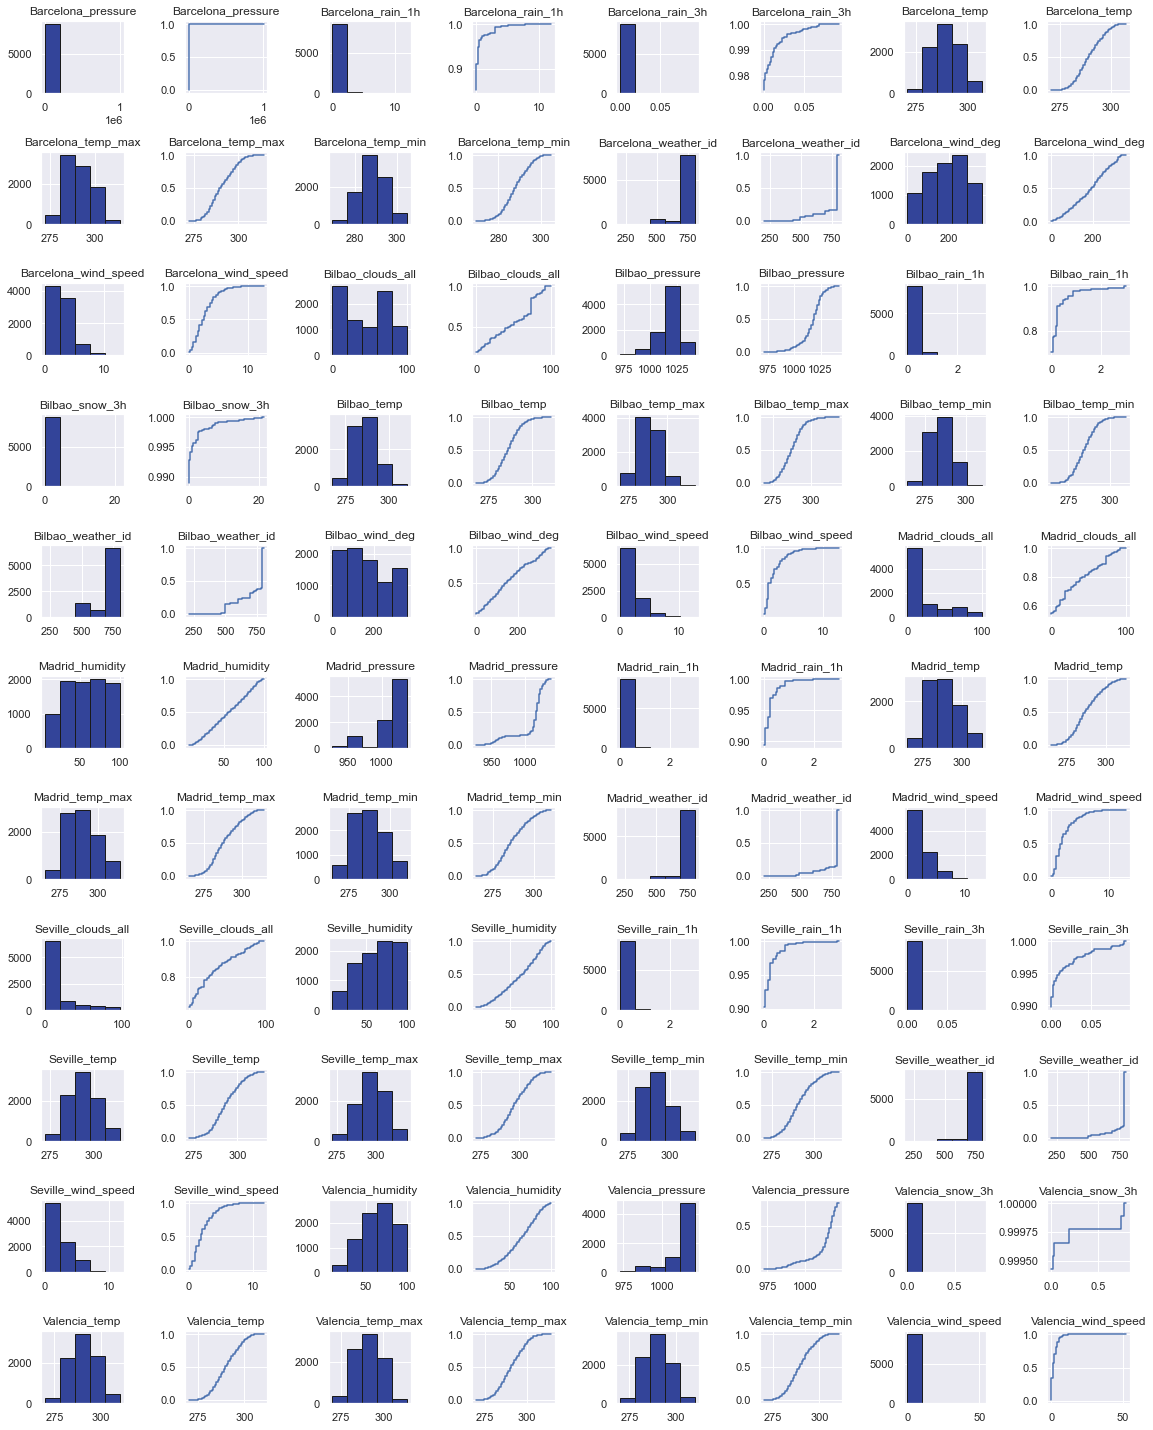

In [37]:
fig, axs = plt.subplots(11,8, figsize=(16,20),)

fig.subplots_adjust(hspace = 0.5, wspace=.2)

i = 0
axs = axs.ravel()

for index, column in enumerate(num_train_feature_cols) :                    #Iterate through the numerical columns
    axs[i].set_title("{}".format(column),fontsize=12)    #Plot the axis title

    axs[i].hist(x = train_df[column],                                      # Plot the scatter graphs
                    bins = 5,
                    color='#349',edgecolor='k')
    i += 1                                         #Iterate to the next axis after plotting 
    
    ecdf = ECDF(train_df[column])
    x = np.linspace(min(train_df[column]), max(train_df[column]))
    y = ecdf(x)

    axs[i].set_title("{}".format(column),fontsize=12)    #Plot the axis title
    axs[i].step(x = x, y = y)

    i += 1                                         #Iterate to the next axis after plotting 
    fig.tight_layout(pad=1)
    # fig.show()

The plot shows the **frequency distribution** of the features' data, & would assist in eliminating features who's variance may not serve the predictability nature of the model.

Each histogram includes an Empirical Cumulative Distribution plot to similarly show the frequency distribution. <br/>
Here's an [interesting article][1] showing preference of ECDFs against histograms

[1]: https://towardsdatascience.com/6-reasons-why-you-should-stop-using-histograms-and-which-plot-you-should-use-instead-31f937a0a81c

##### Categorical Data Visualization

###### Bar Charts
Plotting **Bar Charts** of categorical data, excluding the time feature

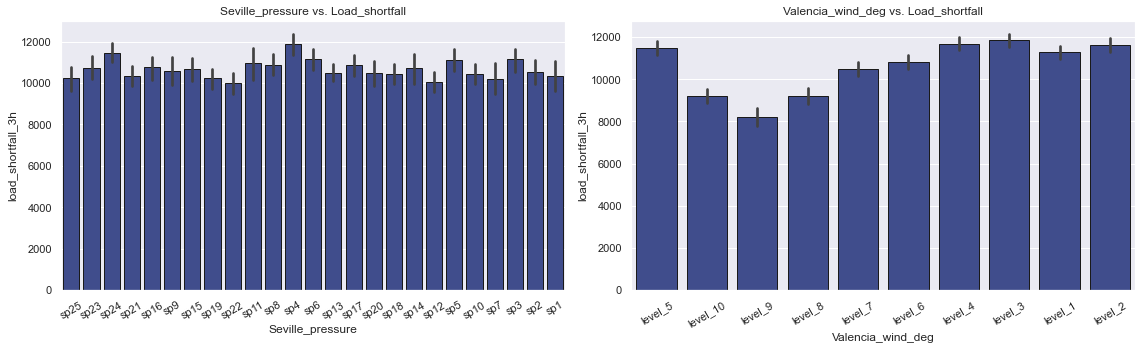

In [29]:
fig, axs = plt.subplots(1,2, figsize=(16,5),)

fig.subplots_adjust(hspace = 0.5, wspace=.2)

i = 0
axs = axs.ravel()
cols = [i for i in cat_train_feature_cols if i != 'time']   #List of columns excluding the time feature.

for index, column in enumerate(cols) :                    #Iterate through the numerical columns
    axs[i].set_title("{} vs. Load_shortfall".format(column),fontsize=12)    #Plot the axis title

    # axs[i].bar(x = train_df[column],                                      # Plot the scatter graphs
    #             height = train_df['load_shortfall_3h'],
    #             color='#349',edgecolor='k')

    sns.barplot(x = train_df[column],                                      # Plot the scatter graphs
                y = train_df['load_shortfall_3h'],
                color='#349',edgecolor='k',
                ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 30)

    i += 1                                         #Iterate to the next axis after plotting 
    fig.tight_layout(pad=1)
    # fig.show()

1. There is small variation on the Load shortfall through the categories of Seville Pressure, ranging between 10K - 12K
2. For Valencia Wind Degree, the variation ranges between 8K - 12K <br/>
The above chart shall be updated in data engineering once the other feature variables required in categorical format are converted.

###### Time Line Graphs

Converting the datetime column to applicable format

In [14]:
train_df['datetime'] = pd.to_datetime(train_df['time'], format='%Y-%m-%d %H:%M:%S')

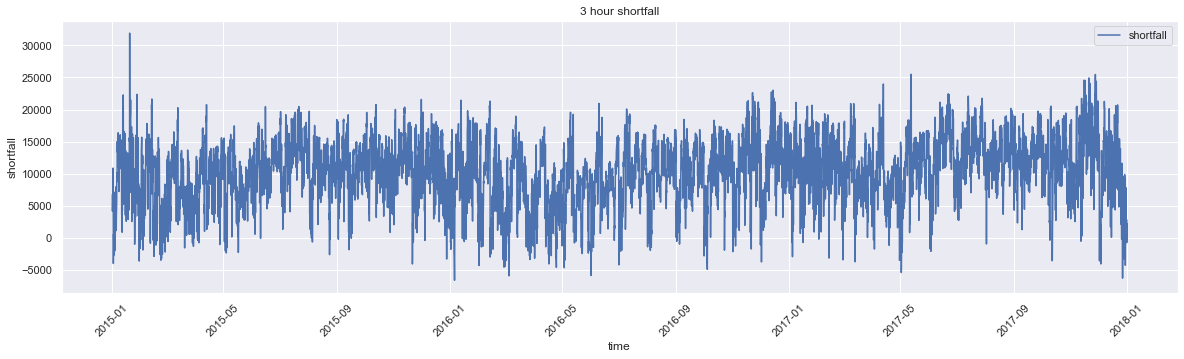

In [18]:
#plot the time line graph
fig,ax = plt.subplots(figsize = (20, 5))
dates = train_df['datetime']
shortfall = train_df['load_shortfall_3h']

ax.plot(dates, shortfall, label = 'shortfall')
ax.set_title('3 hour shortfall')
ax.set_xlabel('time')
ax.set_ylabel('shortfall')
ax.legend()
plt.xticks(rotation=45)
plt.show()

There are both **positive** and **negative** shortfall values. <br/>
The shortfall is the **difference** between the energy generated by means of fossil fuels and various renewable sources. As such, the positive shortfall values indicate that there is a deficit in the amount of energy produced by renewable sources compared to the energy supplied by fossil fuels. The negative shortfall values on the other hand indicate that the amount of energy generated by renewable resources surpasses that of fossil fules.

Homeoscedastity

Residual curves

Kurtosis Values

In [19]:
train_df.kurtosis()

C:\Users\teddy\AppData\Local\Temp/ipykernel_22608/861045134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

In the case of a regression model, **outliers** change the model's equation which leads to errors in estimation. <br/>

A kurtosis of **> 3** is high which indicates a **large number of outliers** whereas a low kurtosis < 3 indicates a lack of outliers. Evidently some weather conditions in various cities have a large number of outliers. <br/>

These include: *Bilbao_rain_1h, Valencia_wind_speed, Bilbao_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h, Madrid_weather_id, Barcelona_weather_id, and Seville_weather_id*. <br/> When buiding our model, we will take note of these features.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows = 9,
                    cols = 5)
i, j = 1, 1
for index, column in enumerate(num_train_feature_cols):
    fig.add_trace(
        go.Scatter(x = train_df[column],
                    y = train_df['load_shortfall_3h'],
                    mode = 'markers',
                    # trendline = 'ols'
                    ),
                    row = i,
                    col = j,
                    secondary_y = False
    )
    j += 1
    if j == 6:
        i += 1
        j = 1
    # fig.columns
fig.update_layout(
    autosize = False,
    width = 1600,
    height = 1600
)

fig.show()

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

fig, axs = plt.subplots(9,5, figsize=(16,20),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)

i = 0
axs = axs.ravel()

for index, column in enumerate(train_feature_cols) :
    axs[i].set_title("{} vs. Load Shortfall".format(column.replace('_', ' ')),fontsize=12)

    plot = sns.scatterplot(x = train_df[column],
                            y = train_df['load_shortfall_3h'],
                            ax = axs[i]
                            )
    ylabels = ['{:.0f}'.format(y) + 'K' for y in plot.get_yticks()/1000 ]
    plot.set_yticklabels(ylabels)

    i += 1

fig.tight_layout(pad=1)

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

We create a copy DF for manipulation & drop the irrelevant column: 'Unnamed:0'

In [3]:
train_copy_df = train_df.drop(['Unnamed: 0'], axis=1)

In [5]:
train_copy_df.head(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


- As previously seen, **Valencia_pressure** contains 2068 null values, which is approximately 25% of the column data.
- We shall fil the missing values using the mean since it is recorded as numerical. According to the info on Kaggle Valencia_pressure is supposed to be expressed as a **category**, which will be another form of manipulation that is required.


In [7]:
train_copy_df = train_copy_df.fillna(round(np.mean(train_copy_df['Valencia_pressure']), 2))

- According to the info on Kaggle {City Name}_wind_degree and {City Name}_pressure are expressed as a category. There might have been human error while capturing the data. There were suppose to be recorded as categorical but some cities recorded as numerical. We have to fix this.
- We can try one hot encoding but we might run into issues seeing that the pressure column has 25 categories


In [8]:
dummies_df = pd.get_dummies(train_copy_df[['Valencia_wind_deg','Seville_pressure']], drop_first = True)

train_copy_df = pd.concat([train_copy_df, dummies_df], axis='columns')
train_copy_df = train_copy_df.drop(['Valencia_wind_deg', 'Seville_pressure' ], axis='columns')
train_copy_df.head(5)

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,0,0,1,0,0,0,0,0,0,0
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,0,0,1,0,0,0,0,0,0,0
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,0,0,1,0,0,0,0,0,0,0
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,0,0,1,0,0,0,0,0,0,0
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,0,0,1,0,0,0,0,0,0,0


this converts our numerical values to categorical

We reorder the columns so that dependent variable is the last column in the dataframe

In [11]:
column_titles = [col for col in train_copy_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
train_copy_df = train_copy_df.reindex(columns = column_titles)

We draw correlation graphs & heatmpas for the data

###### Correlation Table

In [12]:
train_copy_df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,-0.113807,-0.101987,0.051647,0.050881,0.023339,0.035207,0.012197,0.012842,-0.005568,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.001711,0.038834,-0.024340,-0.032579,-0.031405,-0.021876,-0.026230,-0.013346,-0.010522,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.064648,0.021582,0.040077,0.028170,-0.003543,-0.006408,-0.005885,-0.000902,-0.001530,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,0.113068,0.141483,-0.067959,-0.117402,-0.071891,-0.072023,-0.049795,-0.062759,-0.042192,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,0.174900,0.163829,-0.068738,-0.134485,-0.094930,-0.103408,-0.061511,-0.094460,-0.053552,-0.150536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seville_pressure_sp6,0.035207,-0.021876,-0.006408,-0.072023,-0.103408,0.010356,-0.010343,-0.026161,-0.011238,0.006995,...,-0.048832,-0.049147,-0.042411,-0.048768,-0.046708,1.000000,-0.031574,-0.049648,-0.032397,0.019967
Seville_pressure_sp7,0.012197,-0.026230,-0.005885,-0.049795,-0.061511,0.000495,-0.013488,-0.022930,-0.021853,-0.005538,...,-0.031331,-0.031534,-0.027211,-0.031291,-0.029969,-0.031574,1.000000,-0.031855,-0.020787,-0.012828
Seville_pressure_sp8,0.012842,-0.013346,-0.000902,-0.062759,-0.094460,0.038058,-0.006562,-0.017886,-0.028447,0.007011,...,-0.049266,-0.049584,-0.042788,-0.049203,-0.047124,-0.049648,-0.031855,1.000000,-0.032686,0.009394
Seville_pressure_sp9,-0.005568,-0.010522,-0.001530,-0.042192,-0.053552,-0.003176,-0.003113,-0.009321,-0.002288,0.001499,...,-0.032148,-0.032356,-0.027921,-0.032107,-0.030750,-0.032397,-0.020787,-0.032686,1.000000,-0.002491


###### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

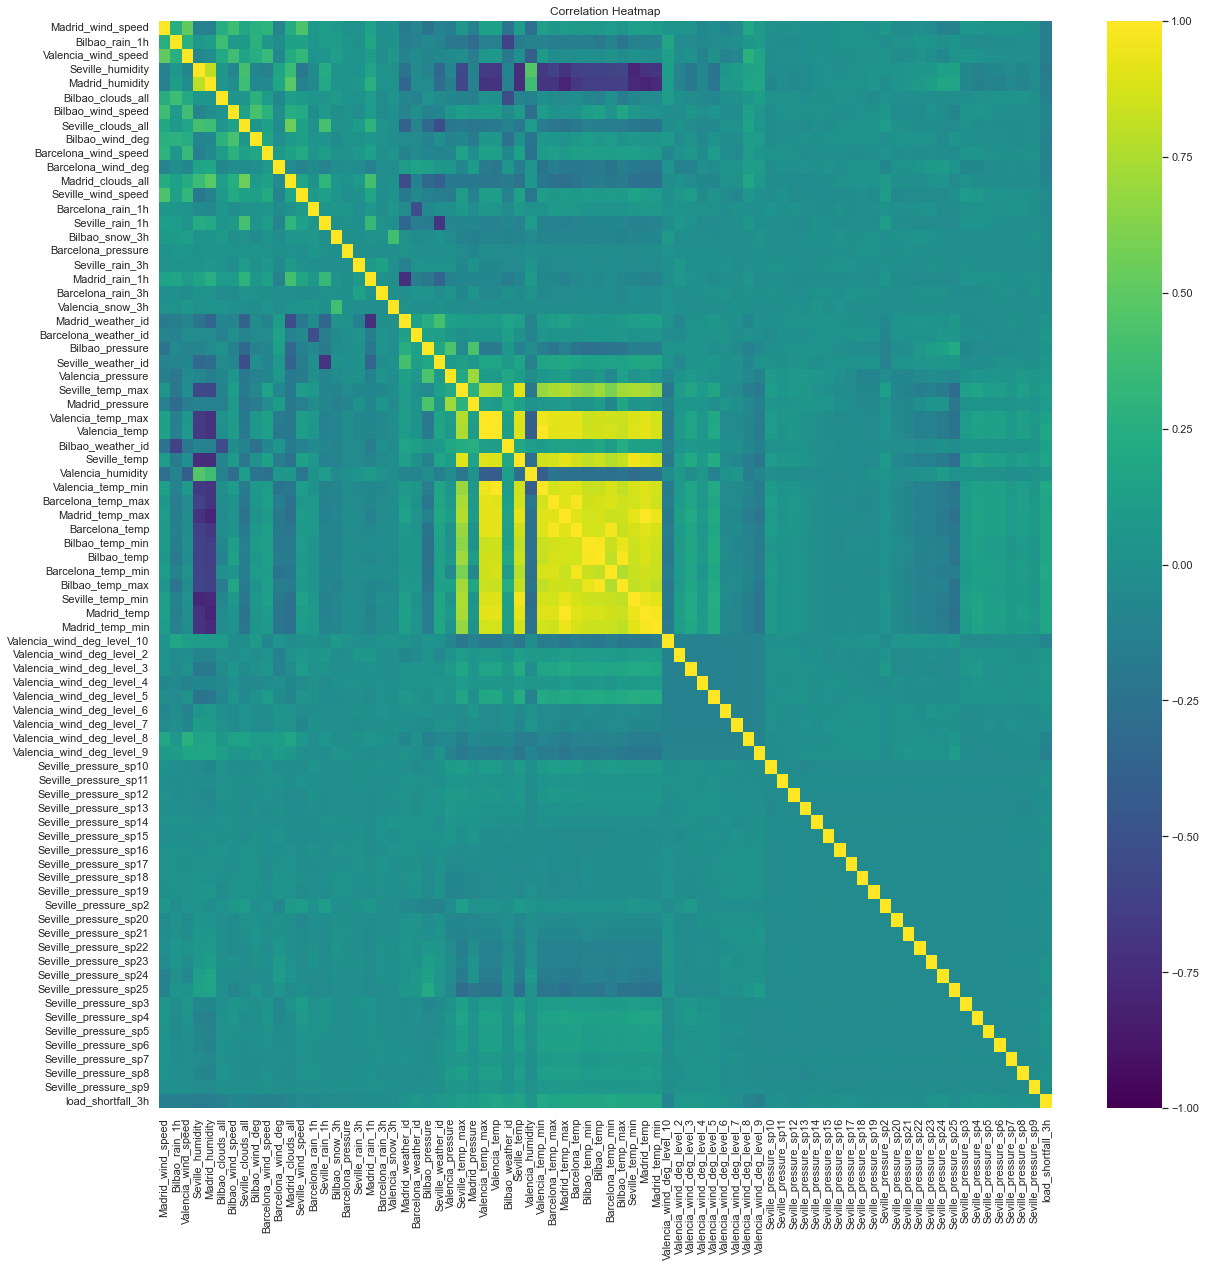

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
heatmap = sns.heatmap(train_copy_df.corr(),ax=ax, vmin=-1, vmax=1, annot=False, cmap="viridis")
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})


The heatmap indicates high muticollinearity between some columns which are denoted with 'min' and 'max'. <br/>
For example Madrid_temp and Madrid_temp_min are highly correlated. When variables are highly correlated, one can be predicted from the other. <br/>

The reason we go for regression model is we want to understand the impact of all the variables on the load_shortfall which is our target, individually.

#### Scaling of data

Standardizing  the data using z-score standardization due to the presence of outliers in our data

##### Implementing Ridge & Lasso Regression

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [21]:


#the dependent variable 
y_shortfall = 'load_shortfall_3h'

#the independent variables
x_names = [col for col in train_copy_df.columns if col!= 'load_shortfall_3h' and col!= 'time']

#build OLS formula string
formula_str = y_shortfall + " ~ " + " + ".join(x_names)
print ("Formula:\n\t {}".format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Valencia_wind_deg_level_10 + Valencia_wind_deg_level_2 + Valencia_wind_deg_level_3 + Valencia_wind_deg_level_4 + Valencia_wind_deg_

The above is the formula to be used during fitting of the regression model. <br/>
We now fit the model below.

In [22]:
#fit the model using the model dataframe
model = ols(formula = formula_str, data = train_copy_df)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     22.13
Date:                Mon, 21 Feb 2022   Prob (F-statistic):          1.96e-275
Time:                        11:11:11   Log-Likelihood:                -86659.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8685   BIC:                         1.740e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

We are only interested in the **P-value** for now. The **smaller** the p-value the more significant the feature is with respect to the load_shortfall. <br/>

We also consider the 1%, 5% and 10% level of significance and disregarding if it exceeds 10% <br/>

For example we can see that the Madrid_wind_speed has a very low p-value and has a coefficeint of -240.9207 meaning if Madrid_wind_speed increases by 1 unit then the load_shortfall decreases by -240.9207 units <br/>

We still have an isssue because the **condition number** is large and this might indicate that there are **strong multicollinearity** or other numerical problems. We need to filter the features some more. <br/>

Let us evaluate their **significance** and correlation. Lets evaluate features that have the strongest correlations (both positive and negative)



In [24]:
#calculate the correlation between predictor variables and the response variable
corrs = train_copy_df.corr()['load_shortfall_3h'].sort_values(ascending=False)

#Build a dictionary of correlation coefficients and p-values
corr_p_dict = {}

column_titles = [col for col in corrs.index if col!='load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(train_copy_df[col], train_copy_df['load_shortfall_3h'])[1],6)
    corr_p_dict[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

#create a new dataframe to store the correlation coefficients and p-values for reference    
corr_p_df = pd.DataFrame(corr_p_dict).T
corr_p_df_sorted = corr_p_df.sort_values('P_Value')
corr_p_df_sorted[corr_p_df_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
Valencia_wind_deg_level_2,0.060976,0.000000
Bilbao_rain_1h,-0.152510,0.000000
Barcelona_rain_1h,-0.056633,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Madrid_clouds_all,-0.081623,0.000000
Valencia_wind_deg_level_8,-0.089261,0.000000
Valencia_wind_deg_level_10,-0.091192,0.000000
Seville_weather_id,0.061104,0.000000
Seville_clouds_all,-0.091804,0.000000


The smaller the **P-value** the stronger the evidence that we should reject the *null hypothesis*. Hence a P-value **less than 5%** (typically <= 0.05) is **stastistically significant**. <br/>
We will only consider features which have a p-value of < 0.05 All the features are statistically significant. i.e their p-values are <0.05

In [28]:
#the dependent variable is still the same
y_shortfall= train_copy_df['load_shortfall_3h']

#model building - independent variable (IV) DataFrame 
X_names = list (corr_p_df[corr_p_df['P_Value'] < 0.05].index)
X_data = train_copy_df[X_names]
print(X_data.columns)

Index(['Valencia_temp_min', 'Barcelona_temp_min', 'Madrid_temp',
       'Barcelona_temp', 'Madrid_temp_max', 'Bilbao_temp_max', 'Bilbao_temp',
       'Madrid_temp_min', 'Seville_temp_min', 'Valencia_temp',
       'Bilbao_temp_min', 'Barcelona_temp_max', 'Seville_temp',
       'Bilbao_weather_id', 'Valencia_temp_max', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_wind_deg_level_3', 'Valencia_pressure',
       'Valencia_wind_deg_level_4', 'Barcelona_weather_id',
       'Seville_weather_id', 'Valencia_wind_deg_level_2',
       'Seville_pressure_sp4', 'Valencia_wind_deg_level_5',
       'Valencia_humidity', 'Bilbao_pressure', 'Seville_pressure_sp24',
       'Madrid_weather_id', 'Valencia_snow_3h', 'Barcelona_rain_3h',
       'Seville_pressure_sp12', 'Madrid_rain_1h', 'Seville_pressure_sp22',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Seville_rain_3h',
       'Barcelona_pressure', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Bilbao_wind_speed', 'Madrid_clouds_all', 'Valenc

The above columns have a P-value less than 0.05 & we shall re-fit our model based on them <br/>

Prior to that, we checkk on the correlations of the remaining columns

In [31]:
#create correlation matrix again 
#find rows and columns where correlation coefficients >0.9 or <-0.9
corr = X_data.corr()
r,c = np.where(np.abs(corr) > 0.9) 

#the off diagonal entries
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Valencia_temp,Valencia_temp_max,Barcelona_temp,Barcelona_temp,Madrid_temp_max,Madrid_temp_min,Seville_temp_min,Valencia_temp,Seville_temp,Valencia_temp_max,...,Madrid_temp_max,Seville_temp_min,Seville_temp_max,Valencia_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Valencia_temp,Barcelona_temp_max,Seville_temp
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,...,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,...,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Barcelona_temp_min,0.874447,0.845057,0.964089,0.964089,0.836680,0.838985,0.831689,0.874447,0.779252,0.845057,...,0.836680,0.831689,0.586923,0.879687,0.853881,0.964089,0.836680,0.874447,0.885911,0.779252
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075


The above columns have a correlation coefficient greater than 0.9. <br/>
We shall drop these specific features.

In [33]:
#function to drop columns with a correlation coefficient geater than threshold specified
def find_correlation(data, threshold=0.9, remove_negative=False):
    corr_mat = data.corr()
    if remove_negative:
        corr_mat = np.abs(corr_mat)
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][corr_mat[col] > threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

print(find_correlation(corr))

['Madrid_temp', 'Barcelona_temp', 'Madrid_temp_max', 'Bilbao_temp_max', 'Bilbao_temp', 'Madrid_temp_min', 'Seville_temp_min', 'Valencia_temp', 'Bilbao_temp_min', 'Barcelona_temp_max', 'Seville_temp', 'Valencia_temp_max', 'Seville_temp_max', 'Valencia_temp_min', 'Madrid_pressure', 'Madrid_clouds_all', 'Madrid_humidity']


These would be the columns to be dropped when the correlation coefficient equals 0.9

In [35]:
#Remove columns that are highly correlated
X_remove = find_correlation(corr)

# Take a new subset of our potential independent variables (features)
X_corr_names = [col for col in X_names if col not in X_remove]
print(X_corr_names)

['Barcelona_temp_min', 'Bilbao_weather_id', 'Valencia_wind_deg_level_3', 'Valencia_pressure', 'Valencia_wind_deg_level_4', 'Barcelona_weather_id', 'Seville_weather_id', 'Valencia_wind_deg_level_2', 'Seville_pressure_sp4', 'Valencia_wind_deg_level_5', 'Valencia_humidity', 'Bilbao_pressure', 'Seville_pressure_sp24', 'Madrid_weather_id', 'Valencia_snow_3h', 'Barcelona_rain_3h', 'Seville_pressure_sp12', 'Madrid_rain_1h', 'Seville_pressure_sp22', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_pressure', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Bilbao_wind_speed', 'Valencia_wind_deg_level_8', 'Valencia_wind_deg_level_10', 'Seville_clouds_all', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Bilbao_wind_deg', 'Bilbao_clouds_all', 'Valencia_wind_deg_level_9', 'Valencia_wind_speed', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Seville_humidity']


These are the remaining columns that we shall use to re-fit our model

In [36]:
# Create our new OLS formula based upon our smaller subset of remaining columns
formula_str = 'load_shortfall_3h'+ " ~ " + " + ".join(X_corr_names)
print ("Formula:\n\t {}".format(formula_str))

Formula:
	 load_shortfall_3h ~ Barcelona_temp_min + Bilbao_weather_id + Valencia_wind_deg_level_3 + Valencia_pressure + Valencia_wind_deg_level_4 + Barcelona_weather_id + Seville_weather_id + Valencia_wind_deg_level_2 + Seville_pressure_sp4 + Valencia_wind_deg_level_5 + Valencia_humidity + Bilbao_pressure + Seville_pressure_sp24 + Madrid_weather_id + Valencia_snow_3h + Barcelona_rain_3h + Seville_pressure_sp12 + Madrid_rain_1h + Seville_pressure_sp22 + Seville_rain_1h + Bilbao_snow_3h + Seville_rain_3h + Barcelona_pressure + Seville_wind_speed + Barcelona_rain_1h + Bilbao_wind_speed + Valencia_wind_deg_level_8 + Valencia_wind_deg_level_10 + Seville_clouds_all + Barcelona_wind_speed + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Valencia_wind_deg_level_9 + Valencia_wind_speed + Madrid_wind_speed + Bilbao_rain_1h + Seville_humidity


Re-fitting the model

In [38]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=train_copy_df)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     32.35
Date:                Mon, 21 Feb 2022   Prob (F-statistic):          4.78e-217
Time:                        11:38:20   Log-Likelihood:                -86866.
No. Observations:                8763   AIC:                         1.738e+05
Df Residuals:                    8724   BIC:                         1.741e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

We see that the model is not significantly improved, as there still contains mutlicollinearity aspects to our features. <br/>
As seen in our EDA section, there was little indication of Linear relationship between our features & the predict variable. This confirms it.

#### Training of a Linear Regression Model

In [41]:
# split data
x_train, x_test, y_train, y_test = train_test_split(train_copy_df[X_corr_names],
                                                    train_copy_df['load_shortfall_3h'],
                                                    test_size=0.20,
                                                    shuffle=False)

We split the train data into train & test

In [42]:
# Training and testing data for correlation threshold model
x_corr_train = x_train[X_corr_names]
x_corr_test = x_test[X_corr_names]

In [45]:
# Training and testing data for variance threshold model (threshold = 0.1)
x_var_train = x_train[X_corr_names]
x_var_test = x_test[X_corr_names]

In [46]:
#Fit model
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [47]:
lm.fit(x_train, y_train)
lm_corr.fit(x_corr_train,y_train)
lm_var.fit(x_var_train,y_train)

LinearRegression()

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

Evaluation of the Linear Regression Model

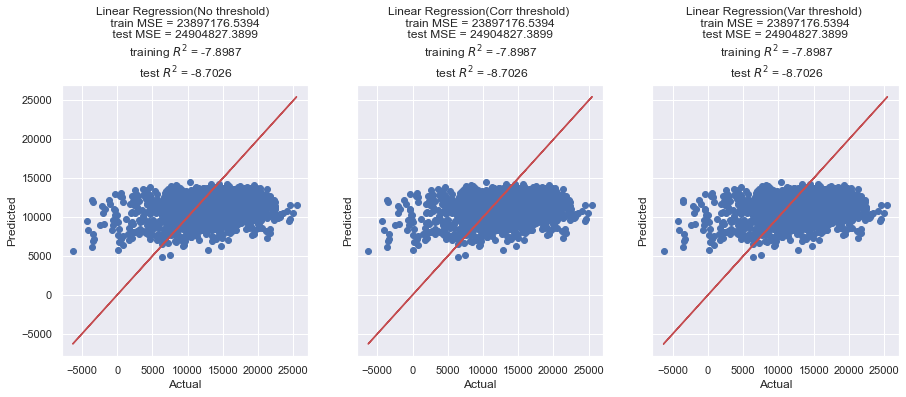

In [49]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(x_train),
              lm_corr.predict(x_corr_train),
              lm_var.predict(x_var_train)]
test_pred = [lm.predict(x_test),
             lm_corr.predict(x_corr_test),
             lm_var.predict(x_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])
    
plt.show()

Based on the above graphs, the model fails to properly fit the data.

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

### 8. Test Predictions

#### Predictions for the Linear Regression Model

In [53]:
#create a copy of the test DF, & select the columns to be used by our model
test_train_df = test_df[[i for i in X_corr_names if i in test_df.columns]]

Carry out the prediction

In [54]:
lm_var.predict(test_train_df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Output .csv results to be uploaded to Kaggle

In [ ]:
#save dataframe to csv
sub_df.to_csv('shortfall.csv', header=True, index=False)